# Lista semana 7 - Pandas 2


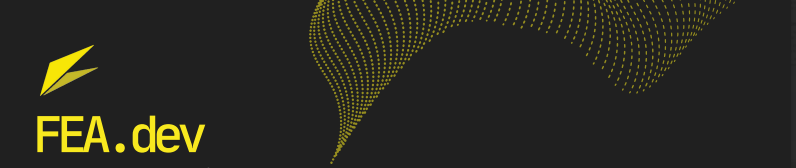

#### **Fala devs, beleza?**
Esta já é a penúltima lista, onde serão abordados mais assuntos relacionados com a biblioteca Pandas. Bom trabalho!

In [ ]:
# Importe a biblioteca Pandas e as demais que pretende usar

## Exercício 1:
Dado o seguinte DataFrame:

In [5]:
import pandas as pd

data = {'Nome': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Pedro', 'Jonas', 'Ana', 'Sofia'],
        'Idade': [25, 30, 22, 35, 28, 19, 27, 39, 29],
        'Salário': [4000, 4500, 3500, 5500, 4800, 3000, 6000, 5000, 4500]}

df = pd.DataFrame(data)

a) Use a função loc para selecionar as linhas correspondentes aos indivíduos com idades entre 25 e 30 anos.

In [7]:
## SEU CÓDIGO COMEÇA AQUI ##
df.loc[(df['Idade'] >= 25) & (df['Idade'] <= 30)]

,Nome,Idade,Salário
0,Alice,25,4000
1,Bob,30,4500
4,Eva,28,4800
6,Jonas,27,6000
8,Sofia,29,4500


b) Use a função iloc para selecionar as linhas correspondentes aos indivíduos na primeira e última posição do DataFrame e tire a média de seus salários.

In [8]:
## SEU CÓDIGO COMEÇA AQUI ##
df.iloc[[0, 8]]['Salário'].mean()

4250.0

## Exercício 2:
Dado o seguinte DataFrame:

In [9]:
data = {'Categoria': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'A', 'C', 'C', 'B', 'A'],
        'Valor': [100, 200, 150, 300, 250, 120, 140, 230, 390, 80, 160, 210]}

df = pd.DataFrame(data)

a) Calcule a média dos valores para cada categoria.

In [10]:
## SEU CÓDIGO COMEÇA AQUI ##
df.groupby('Categoria')['Valor'].mean()

Categoria
A    162.000000
B    187.500000
C    256.666667
Name: Valor, dtype: float64

b) Calcule a soma dos valores para cada categoria. O que possui a maior soma também possui a maior média? Qual a razão disso ocorrer ou não?

In [11]:
## SEU CÓDIGO COMEÇA AQUI ##
df.groupby('Categoria')['Valor'].sum()
# O de maior soma não possui maior média, já que tem maior número (aparece mais vezes)

Categoria
A    810
B    750
C    770
Name: Valor, dtype: int64

## Exercício 3:
Dado o seguinte DataFrame:

In [13]:
data = {'Data': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
        'Produto': ['A', 'B', 'A', 'B'],
        'Vendas': [100, 150, 200, 120]}

df = pd.DataFrame(data)

Crie uma tabela dinâmica (pivot table) que mostre as vendas totais para cada produto em cada data.

In [14]:
## SEU CÓDIGO COMEÇA AQUI #
pivot_table = df.pivot_table(index='Data', columns='Produto', values='Vendas', aggfunc='sum')
pivot_table

Produto,A,B
Data,,
2023-01-01,100,150
2023-01-02,200,120


## Exercício 4:
Dado os seguintes DataFrames:

In [15]:
df1 = pd.DataFrame({'Chave': ['A', 'B', 'C', 'D'],
                    'Valor1': [10, 12, 6, 4]})

df2 = pd.DataFrame({'Chave': ['B', 'D', 'E', 'F'],
                    'Valor2': [9, 6, 11, 8]})

df3 = pd.DataFrame({'Chave': ['C', 'D', 'E', 'G'],
                    'Valor3': [10, 7, 14, 15]})

a) Combine os DataFrames df1 e df2 com base na coluna 'Chave', e deixe a coluna chave como index. Inclua apenas as chaves que aparecem em ambos os dataframes

In [16]:
## SEU CÓDIGO COMEÇA AQUI ##
result = pd.merge(df1, df2, on='Chave', how='inner')
result

,Chave,Valor1,Valor2
0,B,12,9
1,D,4,6


b) Combine os DataFrames df1, df2 e df3, incluindo todas as chaves e valores. Defina "Chave" como index e substitua os valores não existentes por 0.

In [17]:
## SEU CÓDIGO COMEÇA AQUI ##
result = df1.merge(df2, on='Chave', how='outer').merge(df3, on='Chave', how='outer')
result.set_index('Chave', inplace=True)
result.fillna(0, inplace=True)
result

,Valor1,Valor2,Valor3
Chave,,,
A,10.0,0.0,0.0
B,12.0,9.0,0.0
C,6.0,0.0,10.0
D,4.0,6.0,7.0
E,0.0,11.0,14.0
F,0.0,8.0,0.0
G,0.0,0.0,15.0


c) Adicione uma nova coluna ao dataframe, contendo a soma do valor 1, 2 e 3 para cada chave.

In [18]:
## SEU CÓDIGO COMEÇA AQUI ##
result['Soma'] = result['Valor1'] + result['Valor2'] + result['Valor3']
result

,Valor1,Valor2,Valor3,Soma
Chave,,,,
A,10.0,0.0,0.0,10.0
B,12.0,9.0,0.0,21.0
C,6.0,0.0,10.0,16.0
D,4.0,6.0,7.0,17.0
E,0.0,11.0,14.0,25.0
F,0.0,8.0,0.0,8.0
G,0.0,0.0,15.0,15.0


## Exercício 5
Vamos importar dados de ações utilizando a biblioteca Yahoo Finance, e você trabalhará em cima deste dataframe.

In [19]:
# Caso não tenha essa biblioteca instalada, rode o código a seguir:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --- ------------------------------------ 0.3/2.9 MB 7.9 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/2.9 MB 17.5 MB/s eta 0:00:01
     ------------------------------- -------- 2.3/2.9 MB 18.3 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 17.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     

In [20]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["BBAS3.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-06-01"
end_date = "2023-06-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


a) Faça um novo dataframe, contendo as colunas de preço de fechamento ajustado ('Adj Close') e de volume de negociações ('Volume').

In [22]:
data2 = data.loc[:,'Adj Close':'Volume']
data2

,Adj Close,Volume
Date,,
2020-06-01,25.010447,22043600
2020-06-02,25.812662,15772200
2020-06-03,27.330589,29497200
2020-06-04,27.480032,23947100
2020-06-05,27.684513,35546100
...,...,...
2023-05-25,42.787666,11695400
2023-05-26,42.538574,9590300
2023-05-29,42.461926,3307900


b) Em qual dia a ação atingiu sua maior cotação?

In [23]:
## SEU CÓDIGO COMEÇA AQUI ##
data2.loc[data2['Adj Close'] == data2['Adj Close'].max()]

,Adj Close,Volume
Date,,
2023-05-30,42.825993,18427000


c) Em qual dia a ação foi mais negociada?

In [24]:
## SEU CÓDIGO COMEÇA AQUI ##
data2.loc[data2['Volume'] == data2['Volume'].max()]

,Adj Close,Volume
Date,,
2021-02-22,23.260904,102036100


d) Adicione uma coluna no dataframe, contendo a variação percentual da cotação da ação

In [25]:
## SEU CÓDIGO COMEÇA AQUI ##
data2['Var Per'] = data2['Adj Close'].pct_change()
data2

,Adj Close,Volume,Var Per
Date,,,
2020-06-01,25.010447,22043600,NaN
2020-06-02,25.812662,15772200,0.032075
2020-06-03,27.330589,29497200,0.058806
2020-06-04,27.480032,23947100,0.005468
2020-06-05,27.684513,35546100,0.007441
...,...,...,...
2023-05-25,42.787666,11695400,0.001121
2023-05-26,42.538574,9590300,-0.005822
2023-05-29,42.461926,3307900,-0.001802


e) Calcule o retorno anualizado médio da ação. Considere que um ano possui 252 dias úteis em média.

In [26]:
## SEU CÓDIGO COMEÇA AQUI #
r = data2['Var Per'].mean()*252
r

0.23341004297098278

## QUESTÃO 6

Você tem um DataFrame com informações sobre produtos em um estoque, incluindo nomes de produtos, preços e quantidades em estoque. Resolva as seguintes tarefas:

a) Agrupe os produtos por categoria e calcule a média e a mediana dos preços por categoria.

In [29]:
data = {'Produto': ['A', 'B', 'C', 'D', 'E'],
        'Categoria': ['Eletrônicos', 'Roupas', 'Eletrônicos', 'Roupas', 'Eletrônicos'],
        'Preço': [1000, 50, 800, 30, 1200],
        'Quantidade_Estoque': [10, 15, 5, 8, 12]}

##seu código começa aqui###

data = {'Produto': ['A', 'B', 'C', 'D', 'E'],
        'Categoria': ['Eletrônicos', 'Roupas', 'Eletrônicos', 'Roupas', 'Eletrônicos'],
        'Preço': [1000, 50, 800, 30, 1200],
        'Quantidade_Estoque': [10, 15, 5, 8, 12]}

df = pd.DataFrame(data)

# Agrupe os produtos por categoria e calcule a média e a mediana dos preços
resumo_categoria = df.groupby('Categoria')['Preço'].agg(['mean', 'median'])

# Renomeie as colunas para melhor clareza
resumo_categoria = resumo_categoria.rename(columns={'mean': 'Média de Preços', 'median': 'Mediana de Preços'})

# Exiba o resumo
print(resumo_categoria)

             Média de Preços  Mediana de Preços
Categoria                                      
Eletrônicos           1000.0             1000.0
Roupas                  40.0               40.0


b) Encontre o produto mais caro em estoque.

In [30]:
data = {'Produto': ['A', 'B', 'C', 'D', 'E'],
        'Categoria': ['Eletrônicos', 'Roupas', 'Eletrônicos', 'Roupas', 'Eletrônicos'],
        'Preço': [1000, 50, 800, 30, 1200],
        'Quantidade_Estoque': [10, 15, 5, 8, 12]}

##seu código começa aqui###

produto_mais_caro = df[df['Preço'] == df['Preço'].max()]
print(produto_mais_caro)



  Produto    Categoria  Preço  Quantidade_Estoque
4       E  Eletrônicos   1200                  12


## QUESTÃO 7

Suponha que você tenha um DataFrame com informações sobre jogos de video game, incluindo o nome do jogo, a plataforma em que ele foi lançado e sua classificação. Realize as seguintes tarefas:

a) Crie um DataFrame a partir dos seguintes dados:

In [ ]:
data = {'Nome_Jogo': ['Super Mario Odyssey', 'The Legend of Zelda', 'FIFA 22', 'Call of Duty: Warzone'],
        'Plataforma': ['Nintendo Switch', 'Nintendo Switch', 'PlayStation 5', 'Xbox Series X'],
        'Classificacao': ['E', 'E', 'E', 'M']}


In [31]:
### seu código começa aqui###
import pandas as pd

data = {'Nome_Jogo': ['Super Mario Odyssey', 'The Legend of Zelda', 'FIFA 22', 'Call of Duty: Warzone'],
        'Plataforma': ['Nintendo Switch', 'Nintendo Switch', 'PlayStation 5', 'Xbox Series X'],
        'Classificacao': ['E', 'E', 'E', 'M']}

df = pd.DataFrame(data)


b) Agrupe os jogos por plataforma e conte quantos jogos estão disponíveis em cada plataforma.

In [32]:
### seu código começa aqui###

contagem_por_plataforma = df.groupby('Plataforma')['Nome_Jogo'].count().reset_index()
contagem_por_plataforma = contagem_por_plataforma.rename(columns={'Nome_Jogo': 'Quantidade de Jogos'})


c) Encontre a plataforma com a maior quantidade de jogos.

In [33]:
### seu código começa aqui###

plataforma_mais_jogos = contagem_por_plataforma[contagem_por_plataforma['Quantidade de Jogos'] == contagem_por_plataforma['Quantidade de Jogos'].max()]


## QUESTÃO 8

Você possui um DataFrame com informações sobre espécies de árvores encontradas em diferentes estados do Brasil. O DataFrame possui as colunas 'Estado', 'Espécie', 'Quantidade', e 'Altura Média'. Crie uma análise de dados para responder às seguintes perguntas e aprenda algumas curiosidades interessantes sobre as árvores do Brasil:

In [34]:
import pandas as pd

data = {'Estado': ['São Paulo', 'São Paulo', 'Rio de Janeiro', 'Rio de Janeiro', 'Minas Gerais'],
        'Espécie': ['Ipê Amarelo', 'Ipê Roxo', 'Ipê Amarelo', 'Ipê Roxo', 'Quaresmeira'],
        'Quantidade': [100, 50, 80, 40, 70],
        'Altura Média': [8, 7, 7, 6, 10]}

df = pd.DataFrame(data)


a) Qual é a espécie de árvore mais comum em cada estado? Mostre uma lista com o nome do estado e a espécie mais comum.

In [35]:
### seu código começa aqui###

esp_cada_estado = df.groupby('Estado')['Espécie'].agg(lambda x: x.value_counts().idxmax()).reset_index()
print("a) Espécie mais comum em cada estado:")
print(esp_cada_estado)



a) Espécie mais comum em cada estado:
           Estado      Espécie
0    Minas Gerais  Quaresmeira
1  Rio de Janeiro  Ipê Amarelo
2       São Paulo  Ipê Amarelo


b) Qual é a altura média das árvores por espécie? Apresente uma tabela que lista as espécies e suas alturas médias.

In [36]:
### seu código começa aqui###

altura_media_por_especie = df.groupby('Espécie')['Altura Média'].mean().reset_index()
print("\nb) Altura média por espécie:")
print(altura_media_por_especie)




b) Altura média por espécie:
       Espécie  Altura Média
0  Ipê Amarelo           7.5
1     Ipê Roxo           6.5
2  Quaresmeira          10.0


c) Qual é o estado com a maior altura média de árvores? Mostre o nome do estado e sua altura média.

In [37]:
### seu código começa aqui###

estado_maior_altura_media = df.groupby('Estado')['Altura Média'].mean().idxmax()
alt_media_maior_estado = df.groupby('Estado')['Altura Média'].mean().max()
print("\nc) Estado com a maior altura média de árvores:")
print(f"Estado: {estado_maior_altura_media}, Altura Média: {alt_media_maior_estado}")




c) Estado com a maior altura média de árvores:
Estado: Minas Gerais, Altura Média: 10.0


d) Qual é o estado com a maior quantidade total de árvores? Mostre o nome do estado e a quantidade total de árvores.

In [38]:
### seu código começa aqui###


estado_maior_quantidade_total = df.groupby('Estado')['Quantidade'].sum().idxmax()
quantidade_total_maior_estado = df.groupby('Estado')['Quantidade'].sum().max()
print("\nd) Estado com a maior quantidade total de árvores:")
print(f"Estado: {estado_maior_quantidade_total}, Quantidade Total: {quantidade_total_maior_estado}")




d) Estado com a maior quantidade total de árvores:
Estado: São Paulo, Quantidade Total: 150


e) Qual é a espécie de árvore com a menor altura média? Mostre o nome da espécie e sua altura média.

In [39]:
### seu código começa aqui###

esp_menor_altura_media = altura_media_por_especie.loc[altura_media_por_especie['Altura Média'].idxmin()]
print("\ne) Espécie de árvore com a menor altura média:")
print(esp_menor_altura_media)



e) Espécie de árvore com a menor altura média:
Espécie         Ipê Roxo
Altura Média         6.5
Name: 1, dtype: object


# DESAFIO 

Você possui um DataFrame com informações sobre uma temporada da Fórmula 1. O DataFrame contém as colunas 'Piloto', 'Equipe', 'Pontuação' e 'Vitórias'. Sua tarefa é encontrar o melhor piloto da temporada com base em sua pontuação e número de vitórias.

In [40]:
import pandas as pd

data = {'Piloto': ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc', 'Lando Norris', 'Valtteri Bottas'],
        'Equipe': ['Mercedes', 'Red Bull Racing', 'Ferrari', 'McLaren', 'Mercedes'],
        'Pontuação': [385, 391, 334, 256, 221],
        'Vitórias': [10, 9, 6, 3, 2]}

df = pd.DataFrame(data)


Encontre o melhor piloto da temporada de acordo com a pontuação e número de vitórias. O melhor piloto é aquele que tem a maior pontuação e, em caso de empate na pontuação, o maior número de vitórias.

In [41]:
### seu código começa aqui###

import pandas as pd

data = {'Piloto': ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc', 'Lando Norris', 'Valtteri Bottas'],
        'Equipe': ['Mercedes', 'Red Bull Racing', 'Ferrari', 'McLaren', 'Mercedes'],
        'Pontuação': [385, 391, 334, 256, 221],
        'Vitórias': [10, 9, 6, 3, 2]}

df = pd.DataFrame(data)

# Classificar o DataFrame com base na pontuação e número de vitórias
melhor_piloto = df.sort_values(['Pontuação', 'Vitórias'], ascending=[False, False]).iloc[0]

print("Melhor piloto da temporada:")
print(melhor_piloto)


Melhor piloto da temporada:
Piloto        Max Verstappen
Equipe       Red Bull Racing
Pontuação                391
Vitórias                   9
Name: 1, dtype: object
